_```GIANG Phuong-Thu, Cécile (3530406)```_

# [LU3IN005] PROJET 3: CHAÎNE DE MARKOV ET EPIDEMIOLOGIE
## _Propagation d'une épidémie dans une population_

L'objectif de ce projet est de manipuler des chaînes de Markov pour étudier la propagation d'une épidémie dans une population.

In [4]:
# Importation de packages

import random as rd
import matplotlib.pyplot as plt
import numpy as np

## Description du modèle

Dans le modèle _```SIR```_, un individu est initialement sain `S`, peut pevenir infecté `I` puis être guéri `R`. La probabilité pour un individu d'être dans un de ces états au temps *t* ne dépend que de l'état dans lequel il est au temps _t-1_.

<img src="Figure_1.png"  align="middle"> 

Un individu dans l'état sain a une probabilité de 0.9 de rester sain et une probabilité de 0.1 de devenir infecté. S'il est infecté, il peut le rester avec une probabilité de 0.5 et guérir avec une probabilité de 0.5. S'il est dans l'état guéri, il le reste avec une probabilité 1.

In [9]:
# Dictionnaire des états de la chaîne de Markov
etats = {'S':0, 'I':1, 'R':2}

**_1. Créer la matrice de transition, i.e. la matrice contenant les probabilités de transition entre les différents états. Vérifier que cette matrice est stochastique._**

In [219]:
# Création de P la matrice de transition
P = np.array([[0.9, 0.1, 0],[0, 0.5, 0.5],[0, 0, 1]])

La matrice P a tous ses coefficients compris entre 0 et 1, et la somme de chaque ligne est égale à 1.
Elle est donc bien stochastique.

**_2. Au temps t = 0, un individu a une probabilité de 0.9 d'être sain et 0.1 d'être infecté. Créer $\Pi_{0}$_ la distribution de probabilité initiale.**

In [7]:
# Création de pi_0 la distribution de probabilité initiale
pi_0 = np.array([0.9, 0.1, 0])

Nous allons regarder l'évolution du nombre d'individus sains, infectés et guéris au cours du temps.

## Tirage aléatoire des cas

Vous allez générer une séquence de taille `n` à l'aide de cette chaîne de Markov.

Pour générer une séquence aléatoire, choisissez un état initial au hasard (en utilisant $\Pi_{0}$); puis choisissez les états suivants en suivant les probabilités de transition (matrice de transition `P`).

Vous pouvez prendre `n = 50`.

In [67]:
'''
Fonction qui génére une séquence aléatoire de taille n à l'aide de la matrice de transition P et de la distribution
initiale pi_0.

@param n: la taille de la séquence
@return: une séquence aléatoire de taille n
'''

def sequence_alea(n):
    sequence = ""
    
    # Choix de l'état initial
    p = rd.random()
    if p < pi_0[0]: sequence += 'S'
    elif p < pi_0[0] + pi_0[1]: sequence += 'I'
    else: sequence += 'R'
    
    # Choix des états suivants
    for i in range(n-1):
        # Le dernier état de la séquence indique la ligne de la matrice P utilisée
        l = etats.get(sequence[-1])
        p = rd.random()
        if p < P[l,0]: sequence += 'S'
        elif p < P[l,0] + P[l,1]: sequence += 'I'
        else: sequence += 'R'
    
    return sequence

In [66]:
# Génération d'une séquence aléatoire de taille n = 50
sequence_alea(50)

'SSSSSSSIRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRR'

## Probabilité d'une séquence

**_1. Calculer la probabilité d'obtenir la séquence d'état:
`SSSSSSIIIIIIIIIIIR`_**

Sachant que la probabilité d'être dans un certain état ne dépend que de l'état précédent, d'après la **_`propriété de Markov d'ordre 1`_**, on peut écrire:

\begin{equation}
\begin{aligned}
    P(SSSSSSIIIIIIIIIIIR) &= P(S) * P(S|S)^{5} * P(I|S) *  P(I|I)^{10} * P(I|R)\\
                          &= 0.9 * 0.9^{5} * 0.1 * 0.5^{10} * 0.5 \\
                          &= 0.00002594
\end{aligned}
\end{equation}


**_2. Calculer la probabilité d'obtenir la séquence d'état:
`SSSSSSSSSSSSIIIR`_**

De la même manière qu'à la question précédente, on peut dire:

\begin{equation}
\begin{aligned}
    P(SSSSSSSSSSSSIIIR) &= P(S) * P(S|S)^{11} * P(I|S) *  P(I|I)^{2} * P(I|R)\\
                          &= 0.9 * 0.9^{11} * 0.1 * 0.5^{2} * 0.5 \\
                          &= 0.003530
\end{aligned}
\end{equation}

## Modélisation d'une population

Vous avez généré une séquence d'états pour un individu.

Maintenant vous allez générer un ensemble de séquences pour pour une population de 20000 individus. A chaque pas de temps, comptez le nombre d'individus sains, infectés et guéris dans la population et affichez l'évolution du nombre d'individus dans les trois états en fonction du temps.

In [169]:
'''
Fonction qui génére un ensemble de séquences aléatoires pour une population de taille n et un temps t,
à l'aide de la matrice de transition P et de la distribution initiale pi_0.
Affiche l'évolution du nombre d'individus dans les états S, I et R en fonction du temps.

@param n: nombre de séquences aléatoires générées (i.e. taille de la population)
@param t: temps (i.e. taille des séquences aléatoires générées)
'''

def modele(n,t,affichage=False):
    # Création de l'ensemble de séquences initiales
    sequences = [sequence_alea(t) for i in range(n)]
    # Listes du nombre d'individus dans les états S, I et R dans le temps
    SIR = {'S':[0]*t, 'I':[0]*t, 'R':[0]*t}
    
    for sequence in sequences:
        for i in range(len(sequence)):
            SIR[sequence[i]][i] += 1
    
    # Affichage du modèle
    if affichage:
        T = [i for i in range(t)]
        plt.xlabel("Temps")
        plt.ylabel("Nombre de personnes dans chaque catégorie")
        plt.plot(T,SIR['S'])
        plt.plot(T,SIR['I'])
        plt.plot(T,SIR['R'])
        plt.legend(('sain.e.s','infecte.e.s','gueri.e.s'))
        plt.show()
    

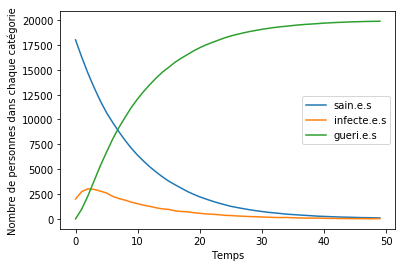

In [172]:
# Modélisation de l'évolution de l'état d'une population
modele(20000,50,True)

D'après le graphe obtenu à partir de ce modèle, le nombre de personnes initialement saines est d'environ 18 000 et le nombre de personnes initialement infectées est d'environ 2 000, ce qui respecte bien les proportions indiquées dans la distribution de probabilités initiale:

$$\Pi_{0} = \begin{pmatrix} 0.9 & 0.1 & 0 \end{pmatrix}$$

Comme l'on pouvait s'y attendre, le nombre d'individus sains diminue au cours du temps au profit du nombre d'individus guéris qui, lui, augmente au fur et à mesure que l'épidémie se propage (individus infectés).

## Modification du modèle

Vous pouvez maintenant modifier le modèle pour étudier différents cas de figure.

**_1. Vous pouvez modifier la taille de la population, la distribution de probabilité initiale et les probabilités de transition pour voir comment cela va affecter la propagation de l'épidémie._**

Commençons par voir si la **taille de la population** notée `n` a un impact sur la propagation de l'épidémie.

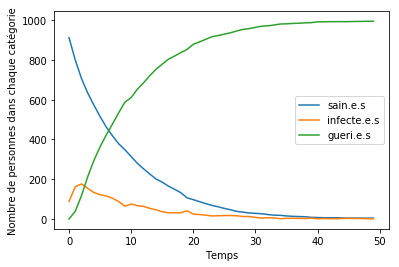

In [192]:
# Avec n = 1 000
modele(1000,50,True)

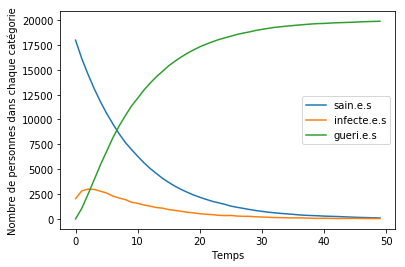

In [193]:
# Avec n = 20 000
modele(20000,50,True)

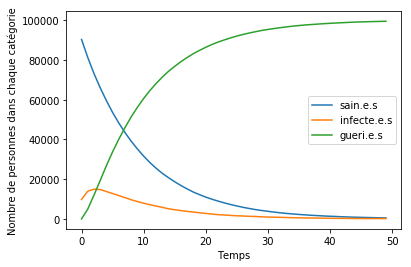

In [194]:
# Avec n = 100 000
modele(100000,50,True)

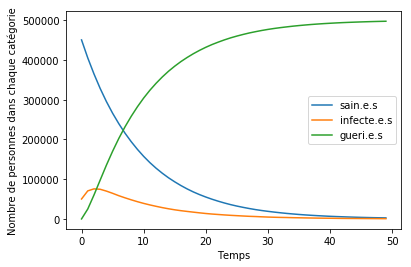

In [201]:
# Avec n = 500 000
modele(500000,50,True)

Nous remarquons bien sur les graphes obtenus ci-dessus que la taille d'une population influe sur le nombre mais pas sur la **proportion** de personnes saines, infectées et guéries: les 3 courbes gardent la même allure pour des `n > 50`. Bien sûr si l'on prend des `n` petits (par exemple `n = 5`) alors les courbes n'auront plus la même allure mais les proportions d'individus dans chaque catégorie resteront néanmoins plus ou moins respectées.

Mesurons maintenant l'impact de la **distribution de probabilité initiale** dans la propagation de l'épidémie.

Nous avons jusque-là travaillé avec la distribution de probabilité initiale $\Pi_{0}$ suivante:

$$\Pi_{0} = \begin{pmatrix} 0.9 & 0.1 & 0 \end{pmatrix}$$

Nous obtenions la répartion `S`-`I`-`R` suivante:

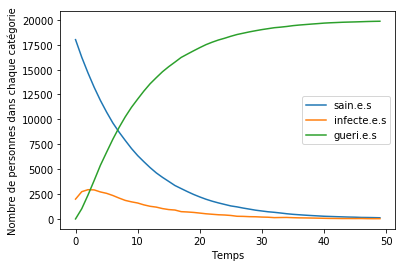

In [202]:
# Avec n = 20 000
modele(20000,50,True)

Imaginons maintenant qu'initialement, il y ait encore moins d'individus infectés par rapport aux individus sains:

$$\Pi_{0} = \begin{pmatrix} 0.99 & 0.01 & 0 \end{pmatrix}$$

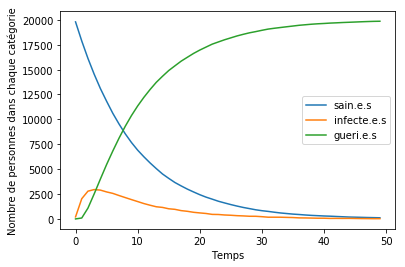

In [207]:
pi_0 = np.array([0.99,0.01,0])

modele(20000,50,True)

La seule chose qui ait changé par rapport à la distribution $\Pi_{0} = (0.9, 0.1,0)$ est que le nombre initial d'infecté est plus élevé; l'évolution des états de la population reste presque inchangée, ce qui est normal puisque la nouvelle distribution $(0.99, 0.01, 0)$ reste très proche de l'ancienne.

Si l'on prend maintenant les distributions suivantes, dans lesquelles il y a toujours plus d'individus sains que d'infectés, mais avec un écart plus faible:

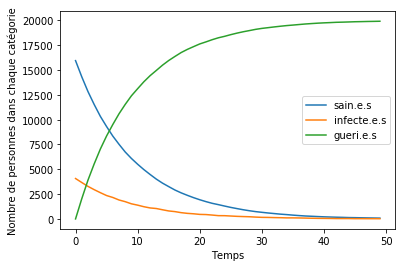

In [210]:
pi_0 = np.array([0.8,0.2,0])

modele(20000,50,True)

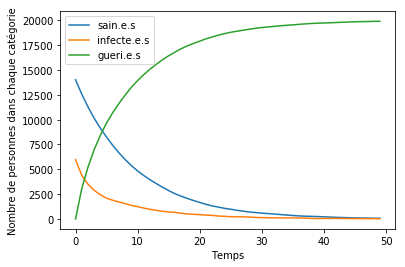

In [211]:
pi_0 = np.array([0.7,0.3,0])

modele(20000,50,True)

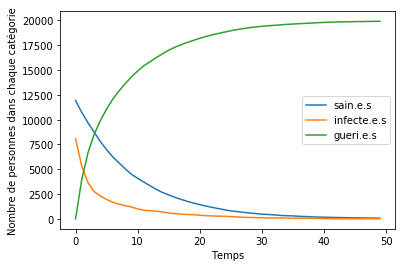

In [212]:
pi_0 = np.array([0.6,0.4,0])

modele(20000,50,True)

Contrairement à avant, les nombres initiaux d'individus sains et infectés sont beaucoup plus proches.

Nous remarquons que pour une probabilité initiale d'être sain inférieure à 0.82 (et donc une probabilité initiale d'être infecté supérieure à 0.18), la courbe des infectés n'accroît plus jusqu'à atteindre un pic mais décroît dès le début.

La modification de la distribution initiale semble également impacter la courbe des personnes guéries: elle croît plus rapidement et donc plus le nombre initial d'infectés est élevé, plus le nombre de guéris augmentera vite pour ensuite se stabiliser.

On comprend donc que la meilleure situation est celle où le nombre de personnes infectées au départ est la moins élevée possible puisque cela garantit un pic d'infecté bien moins élevé que dans le cas où ce nombre est élevé.

Intéressons-nous maintenant à l'impact des **probabilités de transition** sur la propagation de l'épidémie.

Le modèle que l'on avait initialement avec comme matrice de transitions `P`:

$$P = \begin{pmatrix} 0.9 & 0.1 & 0 \\ 0 & 0.5 & 0.5 \\ 0 & 0 & 1 \end{pmatrix}$$

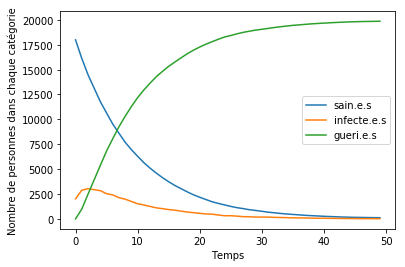

In [223]:
P = np.array([[0.9, 0.1, 0],[0, 0.5, 0.5],[0, 0, 1]])

pi_0 = np.array([0.9,0.1,0])

modele(20000,50,True)

Si l'on **augmente la probabilité d'infection** (i.e. augmenter $P_{12}$ et baisser $P_{11}$), les nombres initiaux d'individus sains et infectés restent inchangés; par contre, le nombre d'infectés croît bien plus rapidement au cours du temps pour atteindre plus vite un pic avant décroître. On a ainsi un nombre d'individus sains qui baisse beaucoup plus vite contre un nombre de guéris qui augmente tout aussi rapidement.

Notons également que plus la probabilité d'infection est élevée, plus le pic d'individus infectés est élevé (environ 13 500 infectés au pic pour $P_{12} = 0.7$ contre 3 000 infectés au pic pour $P_{12} = 0.1$).

On en conclut qu'il est préférable de limiter au mieux la probabilité d'infection afin d'éviter qu'un trop grand nombre de personne ne soit infectée de la maladie.

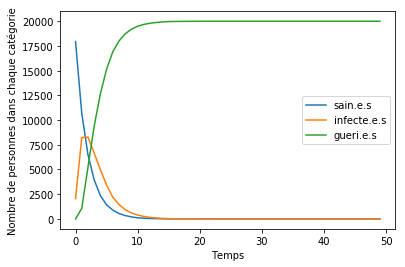

In [226]:
# P11 = 0.6 et P12 = 0.4
P = np.array([[0.6, 0.4, 0],[0, 0.5, 0.5],[0, 0, 1]])

modele(20000,50,True)

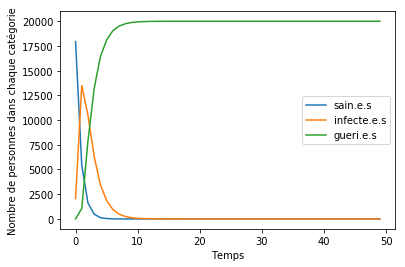

In [227]:
# P11 = 0.3 et P12 = 0.7
P = np.array([[0.3, 0.7, 0],[0, 0.5, 0.5],[0, 0, 1]])

modele(20000,50,True)

Et si maintenant l'on fixe la probabilité d'infection à $P_{12} = 0.1$ comme au départ et que l'on change cette fois-ci la **probabilité de guérison** d'un individu infecté ($P_{23}$) ?

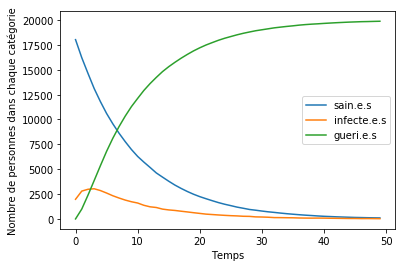

In [228]:
# Modèle de départ: P23 = 0.5
P = np.array([[0.9, 0.1, 0],[0, 0.5, 0.5],[0, 0, 1]])

modele(20000,50,True)

Si l'on diminue la probabilité de guérison d'un individu infecté, alors comme on pouvait s'y attendre la courbe de guérison croît beaucoup plus lentement; et au contraire, le nombre d'infectés atteint vite un pic très élevé (environ 17 000 infectés au pic pour $P_{23} = 0.1$) et prend bien plus de temps à s'atténuer. 

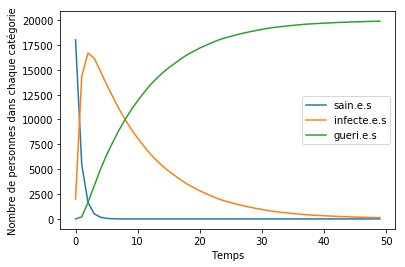

In [229]:
# P23 = 0.1
P = np.array([[0.3, 0.7, 0],[0, 0.9, 0.1],[0, 0, 1]])

modele(20000,50,True)

Si au contraire on augmente la probabilité de guérison d'un individu infecté, alors un pic bien moins élevé d'infectés sera atteint. On comprend donc bien qu'il est important d'optimiser la probabilité qu'une personne infectée guérisse.

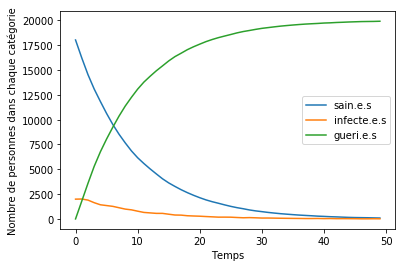

In [231]:
# P23 = 0.9
P = np.array([[0.9, 0.1, 0],[0, 0.1, 0.9],[0, 0, 1]])

modele(20000,50,True)

**En conclusion:**
- la taille de la population n'influe (presque) pas sur la propagation d'une épidémie: elle induit un plus grand nombre de personnes infectées mais la proportion d'infectés rapportée à la population totale reste la même
- il est préférable que la proportion initiale de personnes infectées au départ soit la plus basse possible afin de limiter le nombre de personnes infectées par la suite, et d'en limiter le pic. Par contre cela induit une croissance beaucoup plus faible de la population de guéris (ce qui n'est pas négligeable si l'on prend en compte la possible immunité que rapporte une guérison)
- pour les mêmes raisons, il faut augmenter au mieux la probabilité de guérison tout en limitant le risque d'infection

**_2. Comment l'épidémie évolue-t-elle si vous modifiez la probabilité pour un individu sain de devenir infecté ? On peut notemment imaginer que si des mesures de distanciation sociale sont mises en place, la probabilité de devenir infecté est plus faible_**

J'ai traité ce cas (avec des exemples) dans la question précédente: si l'on **augmente la probabilité d'infection** (cela revient à augmenter $P_{12}$ et baisser $P_{11}$ dans la matrice de transitions `P`), les nombres initiaux d'individus sains et infectés restent inchangés; par contre, le nombre d'infectés croît bien plus rapidement au cours du temps pour atteindre plus vite un pic avant décroître. On a ainsi un nombre d'individus sains qui baisse beaucoup plus vite contre un nombre de guéris qui augmente tout aussi rapidement.

Notons également que plus la probabilité d'infection est élevée, plus le pic d'individus infectés est élevé (environ 13 500 infectés au pic pour $P_{12} = 0.7$ contre 3 000 infectés au pic pour $P_{12} = 0.1$).

On en conclut qu'il est préférable de limiter au mieux la probabilité d'infection afin d'éviter qu'un trop grand nombre de personne ne soit infectée de la maladie: des mesures comme celle de la distanciation sociale qui permettent de limiter le risque d'infection sont donc de bonnes solutions pour limiter la propagation d'une épidémie. Un lavage régulier des mains est également une façon de limiter le risque d'infection.

**_3. Comment la population évolue-t-elle si un individu guéri peut redevenir infecté ?_**

Dans la matrice de transitions `P`, cela reviendrait à remplacer $P_{31}$, normalement nul (car l'on considérait qu'un individu ne pouvait passer de l'état `R` à l'état `S`), par une valeur strictement positive.

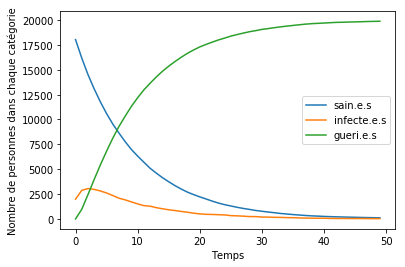

In [235]:
# Modèle de base: P32 = 0 (un individu guéri ne peut pas se réinfecter)
P = np.array([[0.9, 0.1, 0],[0, 0.5, 0.5],[0, 0, 1]])

modele(20000,50,True)

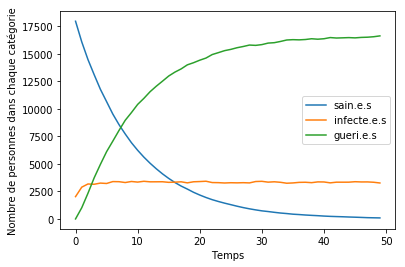

In [237]:
# P32 = 0.1 (un individu guéri a une probabilité 0.1 de se réinfecter)
P = np.array([[0.9, 0.1, 0],[0, 0.5, 0.5],[0, 0.1, 0.9]])

modele(20000,50,True)

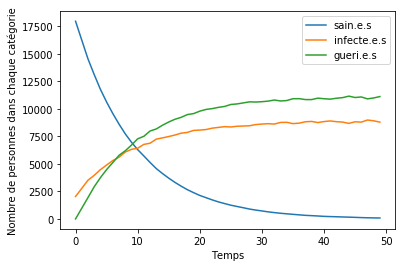

In [238]:
# P32 = 0.4 (un individu guéri a une probabilité 0.4 de se réinfecter)
P = np.array([[0.9, 0.1, 0],[0, 0.5, 0.5],[0, 0.4, 0.6]])

modele(20000,50,True)

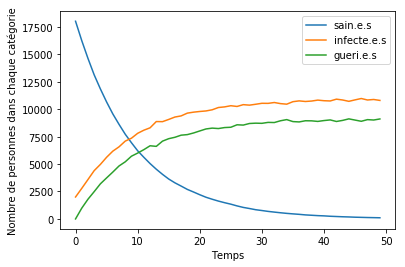

In [239]:
# P32 = 0.6 (un individu guéri a une probabilité 0.6 de se réinfecter)
P = np.array([[0.9, 0.1, 0],[0, 0.5, 0.5],[0, 0.6, 0.4]])

modele(20000,50,True)

Comme on le voit sur les exemple ci-dessus, si un individu guéri peut se réinfecter, alors la courbe des infectés restera croissante dans le temps alors que dans le cas où ce n'est pas possible, le nombre d'infecté tombait à 0 si l'on attendait suffisament longtemps.

Plus la probabilité qu'un individu guéri se réinfecte est grande, plus le nombre d'infectés croît rapidement. Si elle est plus élevée que la probabilité qu'un individu guéri reste guéri, alors le nombre d'infectés sera au final plus élevé que le nombre de guéris.

On en conclut que guérir les individus infectés ne suffit pas: il faut aussi s'assurer qu'une fois guéris, ils ne retombent pas malades. On peut apparenter cela à une immunité acquise après être tombé malade. Une autre façon de faire est de s'assurer que même les individus sains ne tombent pas malades: par un vaccin.

**_4. Quelle remarque critique pouvez-vous faire sur le modèle SIR ? Proposez-vous des améliorations ?_**

Ce modèle pose beaucoup de limites qui font qu'il serait très peu applicable dans la vie réelle:

- il ne prend pas en compte certaines catégories de personnes, comme les personnes qui sont infectées mais pas tout de suite contagieuses (donc pas exactement classables dans I), celles qui meurent des suites de la maladie, le degré de contagiosité (dépendant de la charge virale), la contagiosité en elle-même

- ce modèle prend en compte une probabilité d'être infecté sans lien avec les facteurs environnementaux auxquels les individus sont exposés. Ainsi il ne reflète pas le fait qu'un individu en contamine d'autres, le nombre de nouveaux contaminés en fonction de l'exposition des individus déjà contaminés à une population saine. Il ne permet pas non plus de voir l'impact d'une mise en quarantaine ou au contraire d'une sur-exposition aux facteurs de risques (individus infectés).

On pourrait remédier à certains de ces problèmes:

- en rajoutant de nouveaux états autres que `S`, `I` et `R`: par exemple une catégorie pour les personnes infectées mais en période d'incubation, les personnes qui décèdent de l'épidémie, celles qui développent une immunité en guérissant, celles qui sont porteuses de maladie mais sans symptômes, etc...
- en prenant en compte l'âge ou autres facteurs de contagiosité (par exemple: un jeune enfant transmet plus facilement un virus, une personne âgée développe souvent une forme grave, etc...)
- en prenant en compte les contacts entre individus, les déplacements, etc...